In [31]:
import cv2
from PIL import Image
import numpy as np

WITH STUDENTS


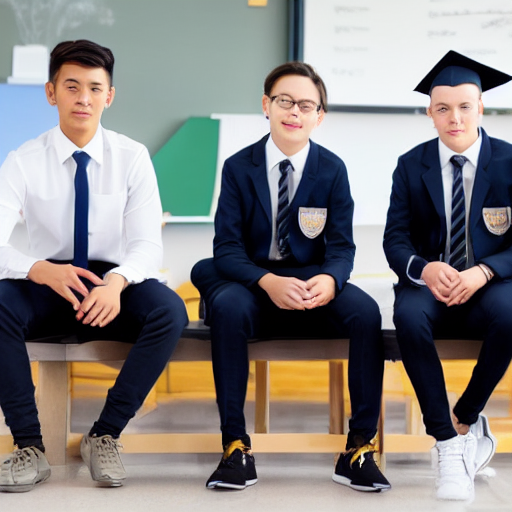

WITHOUT STUDENTS


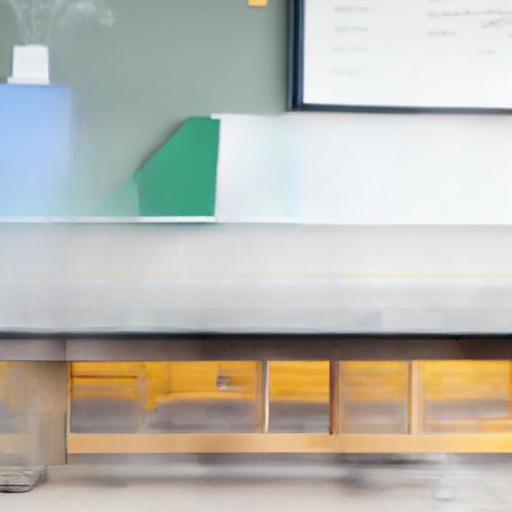

In [32]:
# Load the pictures
with_students = cv2.imread('../with_students.png')
without_students = cv2.imread('../without_students.png')

# Switch Colourspace
with_students = cv2.cvtColor(with_students, cv2.COLOR_RGB2BGR)
without_students = cv2.cvtColor(without_students, cv2.COLOR_RGB2BGR)

# Confirm two pictures are loaded properly
print("WITH STUDENTS")
display(Image.fromarray(with_students))
print("WITHOUT STUDENTS")
display(Image.fromarray(without_students))

DIFFED IMAGE


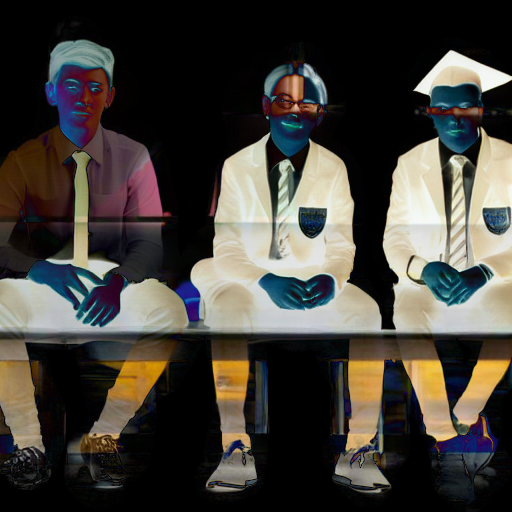

DIFF IMAGE MASK


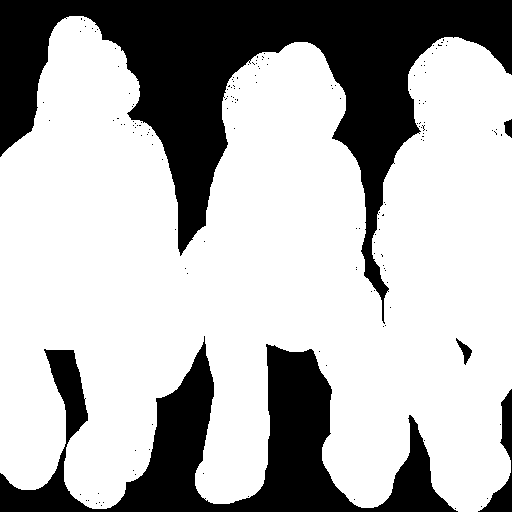

In [33]:
# Create a diffed image
diffed_image = cv2.absdiff(without_students, with_students)
# Display the image
print("DIFFED IMAGE")
display(Image.fromarray(diffed_image))

# Create a mask with the same shape
diffmask = np.zeros(diffed_image.shape, dtype='uint8')

# From the values where the pixel is 0
for i, j in zip(*np.nonzero(np.sum(diffed_image, axis=2))):
    # # Keep a threshold at 5 for some filtering
    # if np.abs(np.sum(diffed_image[i, j])) > 12:
    #     # Add white to the mask
    #     diffmask[i, j, :] = [255, 255, 255]
    # Without threshold
    diffmask[i, j, :] = [255, 255, 255]

# Display the diffmask
print("DIFF IMAGE MASK")
display(Image.fromarray(diffmask))

FINAL IMAGE


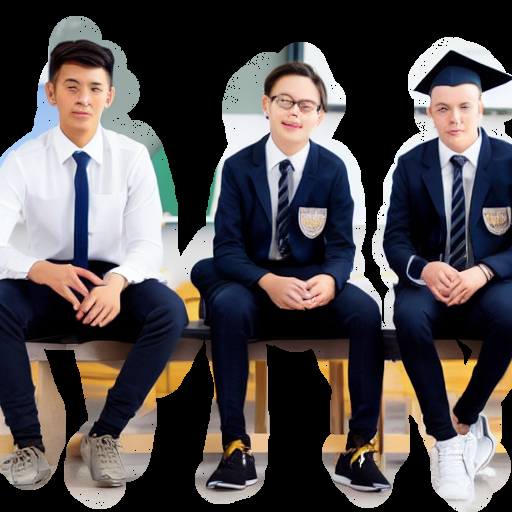

In [34]:
subtracted_image = cv2.bitwise_and(with_students, diffmask)

# Show the picture
print("FINAL IMAGE")
display(Image.fromarray(subtracted_image))